In [1]:
import pickle

In [2]:
at_pareto_results = pickle.load(open("at_pareto_results.pickle", "rb"))
st_pareto_results = pickle.load(open("st_pareto_results.pickle", "rb"))
st_at_pareto_results = pickle.load(open("st_at_pareto_results.pickle", "rb"))

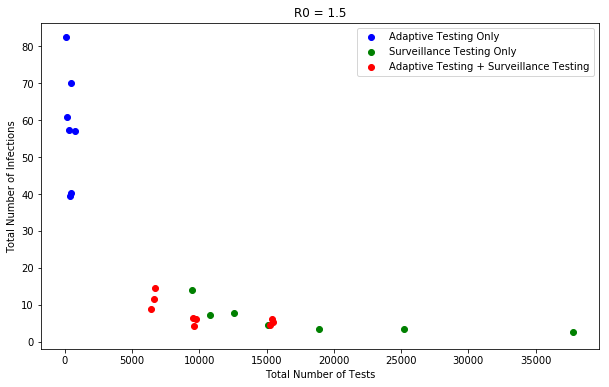

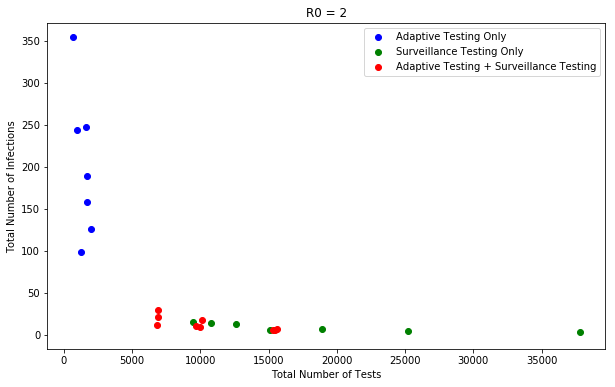

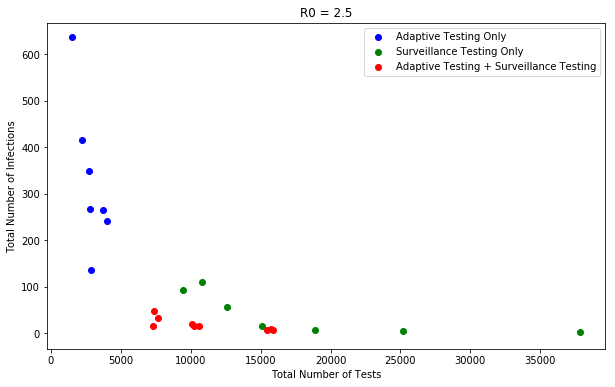

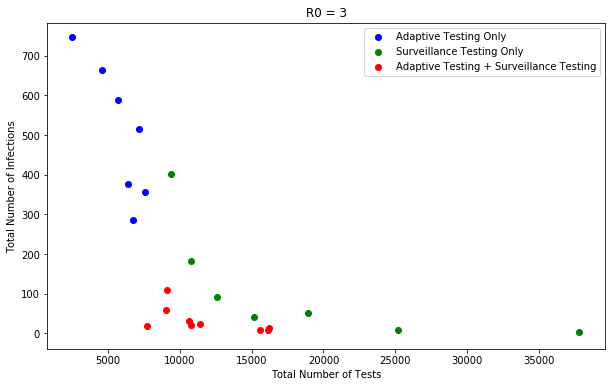

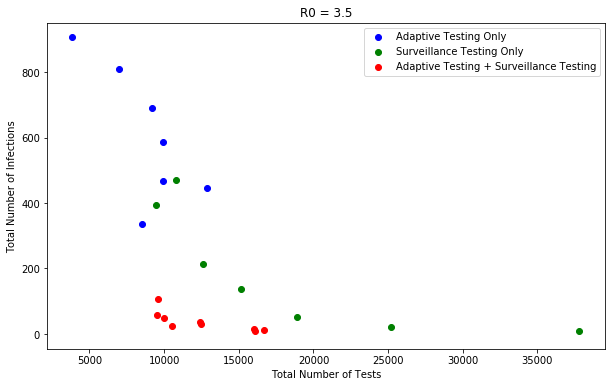

In [6]:
def get_at_results(R0):
    tests = []
    infxns = []
    at_multipliers_to_try = [2, 4, 6, 8, 10, 12, 14]
    for at_mult in at_multipliers_to_try:
        results = at_pareto_results[(R0, at_mult)]
        avg_total_tests = np.mean([r[0] for r in results])
        avg_total_infxns = np.mean([r[-1] for r in results])
        tests.append(avg_total_tests)
        infxns.append(avg_total_infxns)
    return tests, infxns

def get_st_results(R0):
    tests = []
    infxns = []
    st_windows_to_try = [2, 3, 4, 5, 6, 7, 8]

    for st_window in st_windows_to_try:
        results = st_pareto_results[(R0, st_window)]
        avg_total_tests = np.mean([r[0] for r in results])
        avg_total_infxns = np.mean([r[-1] for r in results])
        tests.append(avg_total_tests)
        infxns.append(avg_total_infxns)
    
    return tests, infxns

def get_at_st_results(R0):
    st_windows_to_try = [5, 8, 12]
    at_mults_to_try = [6, 10, 14]
    tests = []
    infxns = []
    for st_window in st_windows_to_try:
        for mult in at_mults_to_try:
            results = st_at_pareto_results[(R0, mult, st_window)]
            avg_total_tests = np.mean([r[0] for r in results])
            avg_total_infxns = np.mean([r[-1] for r in results])
            tests.append(avg_total_tests)
            infxns.append(avg_total_infxns)
    return tests, infxns

R0s_to_try = [1.5, 2, 2.5, 3, 3.5]

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

for R0 in R0s_to_try:
    plt.figure(figsize=(10,6))
    
    tests, infxns = get_at_results(R0)
    plt.scatter(tests, infxns, color='blue', label='Adaptive Testing Only')
    
    tests, infxns = get_st_results(R0)
    plt.scatter(tests, infxns, color='green', label='Surveillance Testing Only')
    
    tests, infxns = get_at_st_results(R0)
    plt.scatter(tests, infxns, color='red', label='Adaptive Testing + Surveillance Testing')
    
    plt.legend(loc='best')
    plt.title("R0 = {}".format(R0))
    plt.xlabel("Total Number of Tests")
    plt.ylabel("Total Number of Infections")
    plt.show()
    